In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [10]:
frame = pd.read_csv('../20210429_wab_1000_regen.csv')

conv_cut = (frame['converted'] == True)
top = (frame['wab_epy'] > 0)
bot = (frame['wab_epy'] < 0)

#filt = pd.read_csv('filt.csv')
#filt

In [7]:
def draw_histogram1D(ax, var, xmin, xmax, bins, **kargs): 
    
    bins = np.linspace(xmin, xmax, bins)
    values, xedges = np.histogram(var, bins=bins)
    bin_centers = (xedges + (xedges[1] - xedges[0])/2)[:-1]
    
    err_min = np.zeros(len(values))
    err_max = np.zeros(len(values))
    if 'errors' in kargs: 
        err_min, err_max = errors(values)
        
    if 'norm' in kargs:
        if kargs['norm'] == 1:
            integral = np.sum(values)
        else: 
            integral = kargs['norm']
            ax.set_ylabel('Event Fraction')
            
        values = values/integral
        
        if 'errors' in kargs: 
            err_min = np.array(err_min)/integral
            err_max = np.array(err_max)/integral
    
    if 'x_label' in kargs: 
        ax.set_xlabel(kargs['x_label'], fontsize=30)
        
    if 'y_label' in kargs: 
        ax.set_ylabel(kargs['y_label'], fontsize=30)
    
    color = 'forestgreen'
    if 'color' in kargs:
        color = kargs['color']

    edgecolor = 'darkgreen'
    if 'edgecolor' in kargs: 
        edgecolor = kargs['edgecolor']
    
    label = ''
    if 'label' in kargs: 
        label = kargs['label']
    
    matplotlib.rcParams.update({'font.size': 22})
    
    ax.hist(bin_centers, bins=xedges, weights=values, alpha=0.3, 
            linewidth=2, color=color, edgecolor=edgecolor, label=label )
    
    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
    ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

    ax.set_title('HPS Simulation Internal', x=.75, fontweight='bold')

    return values, bin_centers

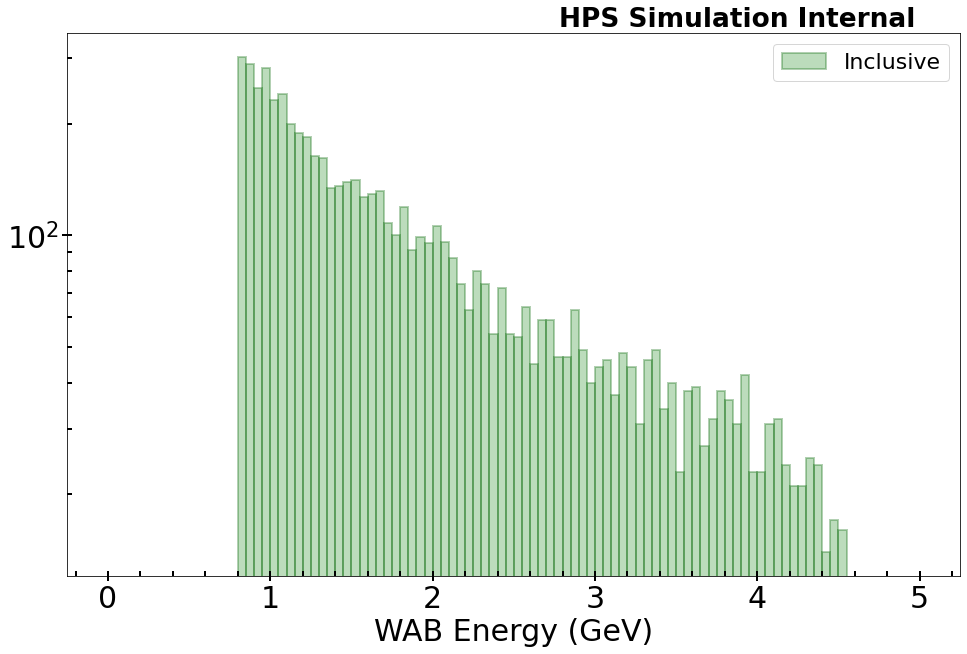

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, frame['wab_energy'], 0, 5, 101, 
                 x_label='WAB Energy (GeV)',
                label='Inclusive')
#draw_histogram1D(ax, frame['wab_energy'][conv_cut], 0, 5, 101,
#                 edgecolor='darkorange', color='orange', 
#                 label='Conversion');
#draw_histogram1D(ax, filt['wab_energy'], 0, 5, 101,
#                 edgecolor='darkblue', color='blue', 
#                 label='Filtered');

ax.legend()
ax.set_yscale('log')

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([-7.5399, -7.5397, -7.5395, -7.5393, -7.5391, -7.5389, -7.5387,
        -7.5385, -7.5383, -7.5381, -7.5379, -7.5377, -7.5375, -7.5373,
        -7.5371, -7.5369, -7.5367, -7.5365, -7.5363, -7.5361, -7.5359,
        -7.5357, -7.5355, -7.5353, -7.5351, -7.5349, -7.5347, -7.5345,
        -7.5343, -7.5341, -7.5339, -7.5337, -7.5335, -7.5333, -7.5331,
        -7.5329, -7.5327, -7.5325, -7.5323, -7.5321, -7.5319, -7.5317,
        -7.5315, -7.5313, -7.5311, -7.5309, -7.5307, -7.5305, -7.5303,
        -7.5301, -7.5299, -7.5297, -7.5295, -7.5293, -7.5291, -7.5289,
        -7.5287, -7.5285, -7.5283, -7.5281, -7.5279, -7.5277, -7.5275,
        -7.5273, -7

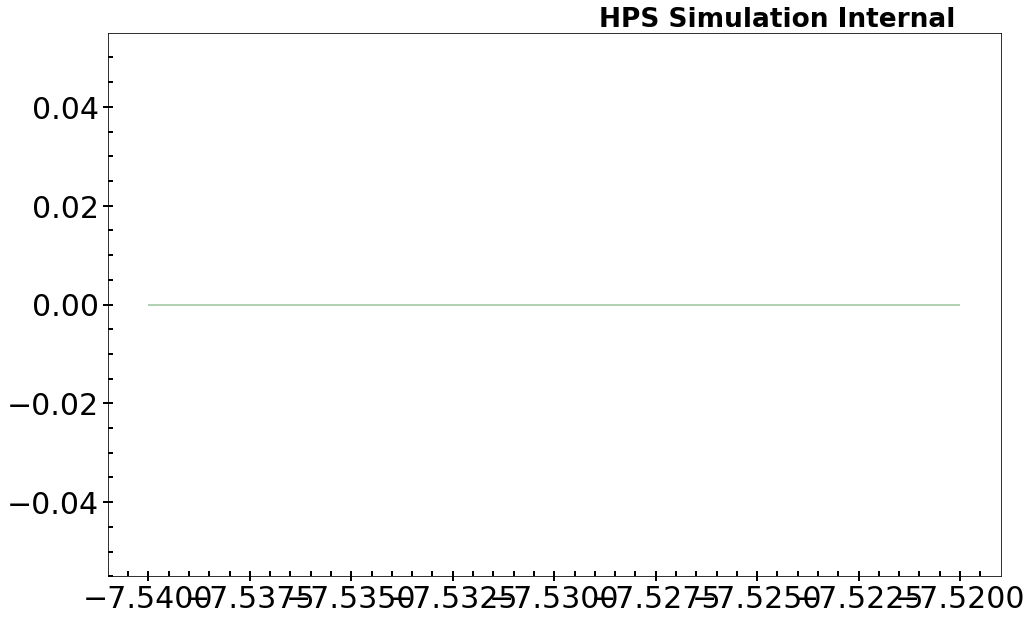

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, frame['wab_vz'], -7.54, -7.52, 101)
#draw_histogram1D(ax, frame['wab_vz'][conv_cut], -7.54, -7.52, 101, color='green');

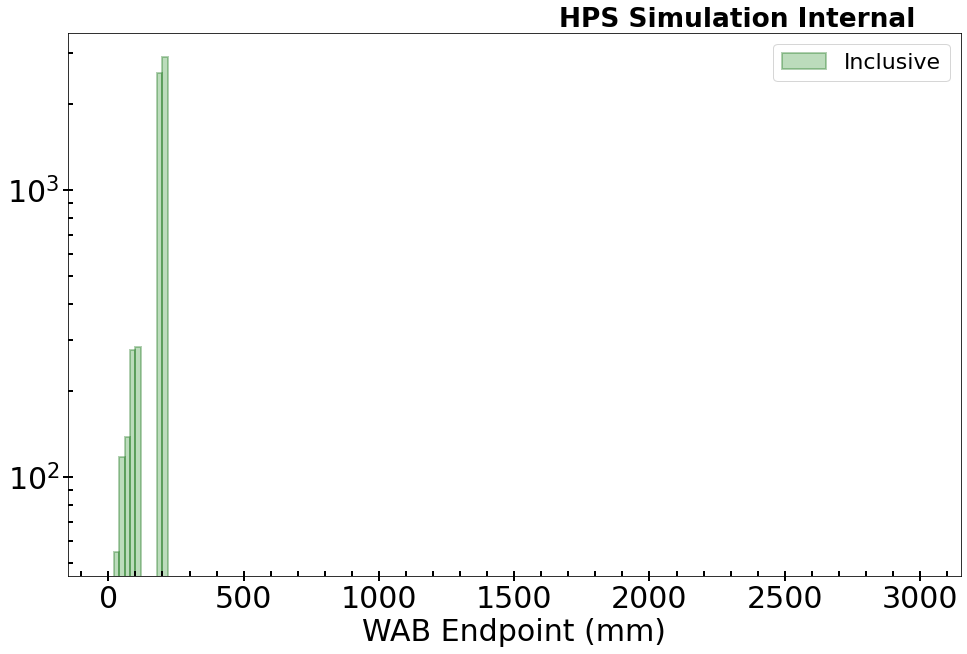

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, frame['wab_epz'], 0, 3000, 151,
                 label='Inclusive', 
                x_label='WAB Endpoint (mm)')
#draw_histogram1D(ax, frame['wab_epz'][conv_cut], 0, 3000, 151, 
#                 edgecolor='darkorange', color='orange', 
#                 label='Conversion');
#draw_histogram1D(ax, filt['wab_epz'], 0, 3000, 151,
#                 edgecolor='darkblue', color='blue', 
#                 label='Filtered');
ax.legend()
ax.set_yscale('log')

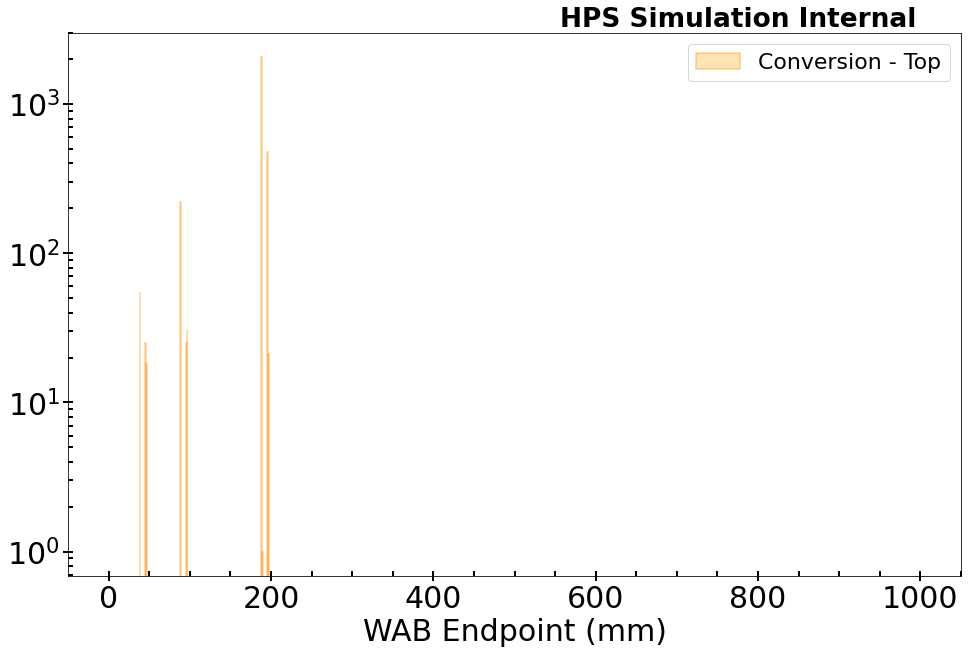

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, frame['wab_epz'][conv_cut & top], 0, 1000, 1001,
                 edgecolor='darkorange', color='orange', 
                 label='Conversion - Top', 
                 x_label='WAB Endpoint (mm)');
#draw_histogram1D(ax, frame['wab_epz'][conv_cut & bot], 0, 1000, 1001,
#                 edgecolor='darkgreen', color='green', 
#                 label='Conversion - Bottom');
#draw_histogram1D(ax, filt['wab_epz'], 0, 1000, 1001,
#                 edgecolor='darkblue', color='blue', 
#                 label='Filtered');
ax.legend()
ax.set_yscale('log')

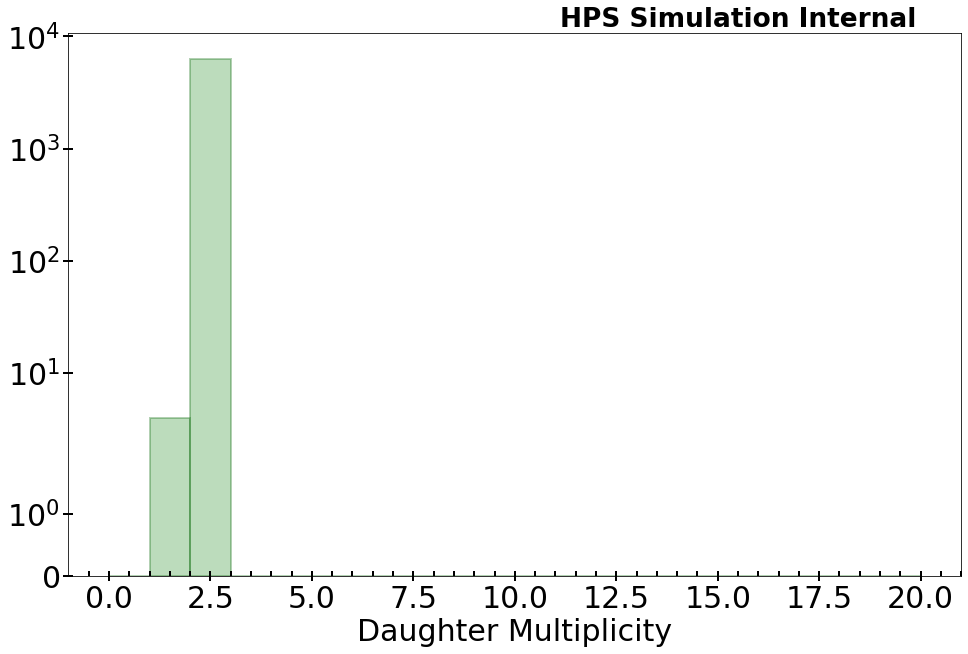

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, frame['daughter_multiplicity'], 0, 20, 21,
                 x_label='Daughter Multiplicity')
#draw_histogram1D(ax, frame['daughter_multiplicity'][conv_cut], 0, 20, 21,
#                 edgecolor='darkorange', color='orange', 
#                 label='Conversion');
#cut = filt['daughter_multiplicity'] == 2
#draw_histogram1D(ax, filt['daughter_multiplicity'][cut], 0, 20, 21,
#                 edgecolor='darkblue', color='blue', 
#                 label='Filtered');
ax.set_yscale('symlog')

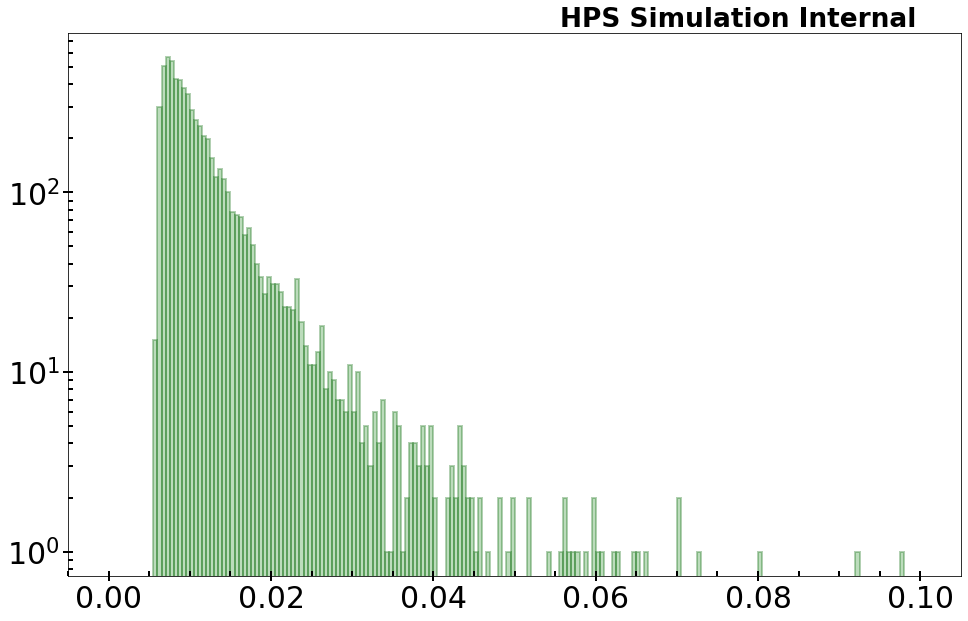

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
draw_histogram1D(ax, frame['wab_theta'], 0, 0.1, 201)
#draw_histogram1D(ax, frame['wab_theta'][conv_cut], 0, 0.1, 201,
#                 edgecolor='darkorange', color='orange', 
#                 label='Conversion');
#draw_histogram1D(ax, filt['wab_theta'], 0, 0.1, 201,
#                 edgecolor='darkblue', color='blue', 
#                 label='Filtered');
ax.set_yscale('log')